<a href="https://colab.research.google.com/github/Sasha-Kirsten/Week_4_Evaluation/blob/main/Week_4_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [636]:
# Importing different libraries for different tasks that we will engage.
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [637]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv

--2022-10-02 17:10:58--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73250 (72K) [text/plain]
Saving to: ‘AER_credit_card_data.csv.16’

AER_credit_card_dat 100%[===================>]  71.53K  --.-KB/s    in 0.01s   

2022-10-02 17:10:58 (5.77 MB/s) - ‘AER_credit_card_data.csv.16’ saved [73250/73250]



# Preparation

In [638]:
# Saving the table from the 'AER_credit_card_data.csv' 
data = pd.read_csv('AER_credit_card_data.csv')
data

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


In [639]:
# Changing the data type like 'yes' or 'no' into 1 and 0.
data['card'] = np.where(data['card'] =='yes' , 1 , 0)

In [640]:
# the numerical list contains the heading of each columns that has only numerical values. 
numerical = ['reports','age', 'income', 'share', 'expenditure', 'dependents', 'months',
            'majorcards', 'active']

In [641]:
from sklearn.model_selection import train_test_split 
# We importing train_test_split from sklearn

In [642]:
data_full_train, data_test = train_test_split(data, test_size=0.2,random_state=1)
# We are now spliting the data_test data from original data, only 20%  

In [643]:
data_train, data_validation = train_test_split(data_full_train, test_size=0.25, random_state=1)
# We are now spliting the data into data_train and data_validation,the data_validation is only 25% 
# of the data_full_train 

In [644]:
data_train = data_train.reset_index(drop=True)
data_validation = data_validation.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

# Here we are reseting the Index of the different data set.

In [645]:
y_train = data_train.card.values
y_validation = data_validation.card.values
y_test = data_test.card.values

# Here we are creating the y variables, for the trainings set, the validation set and test set.

In [646]:
del data_train['card']
del data_validation['card']
del data_test['card']

# Delete the median_house_value variable from the data_train, data_validation, data_test

# Question 1

In [647]:
# Importing libraries from the sklearn.metric so that we can use the roc_auc_score and roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [648]:
roc_auc_score(y_train, data_train.reports)

0.28333701393106236

In [649]:
roc_auc_score(y_train, data_train.dependents)

0.46722427722262094

In [650]:
roc_auc_score(y_train, data_train.active)

0.6043173411362006

In [651]:
roc_auc_score(y_train, data_train.share)

0.989183643423692

In [652]:
fpr, tpr, _ = roc_curve(y_train, data_train.reports)

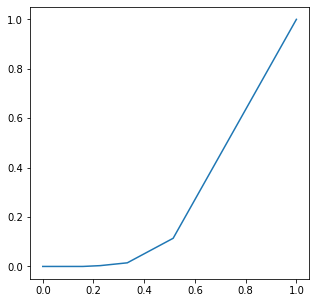

In [653]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr)

In [654]:
# Printing out the values with auc values higher than 5.
for c in numerical:
    auc = roc_auc_score(y_train, data_train[c]) 
    if auc>0.5:
        print(c, auc)

income 0.5908049467233478
share 0.989183643423692
expenditure 0.991042345276873
majorcards 0.5343859842838476
active 0.6043173411362006


The answer to the question is share has the highest AUC.

# Training Model

In [655]:
# Created a list containing the heading of the columns from the imported 
features = ["reports", "age", "income", "share", "expenditure", "dependents", "months", 
            "majorcards", "active", "owner", "selfemp"]

In [656]:
# Importing the DictVectorizer from sklearn.feature_extraction 
from sklearn.feature_extraction import DictVectorizer

In [657]:
# training the data training list that has the "features list"
train_dict = data_train[features].to_dict(orient='records') 

In [658]:
# saving the DictVectorizer into variable dv and saving fit transform of the train_dict into X_train.
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict) 

# Question 2

In [659]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [660]:
val_dict = data_validation[features].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)[:,1]

In [661]:
roc_auc_score(y_validation, y_pred)

0.995171242063847

In [662]:
y_pred_bin = model.predict(X_val)

In [663]:
roc_auc_score(y_validation, y_pred_bin)

0.9739783600107306

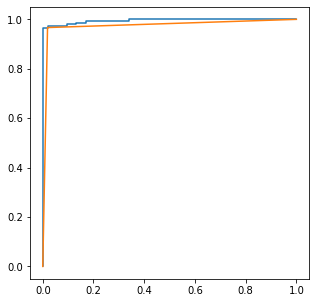

In [664]:
plt.figure(figsize=(5,5))

fpr, tpr, _ = roc_curve(y_validation, y_pred)
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_validation, y_pred_bin)
plt.plot(fpr, tpr)

The answer to the question 2, is that the AUC of the model validation dataset is 0.995 because it is close to 0.974. 

# Question 3

In [665]:
# Created a function for the confusion matrix. 
def confusion_matrix_dataframe(y_val, y_pred):
    score=[]
    
    thresholds = np.linspace(0, 1, 101)
    
    for t in thresholds:
        actual_positive = (y_validation ==1)
        actual_negative = (y_validation ==0)
        
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
        
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        
        fp = (predict_positive & actual_positive).sum()
        fn = (predict_negative & actual_negative).sum()
        
        score.append((t, tp, fp, fn, tn))
    columns = ['thresholds', 'tp', 'fn', 'tn', 'fp']
    data_score = pd.DataFrame(score, columns=columns)
    
    return data_score

In [666]:
# using confusion matrix into y_validation and y_pred into data_score
data_score = confusion_matrix_dataframe(y_validation, y_pred)

In [667]:
data_score[::10]

,thresholds,tp,fn,tn,fp
0,0.0,211,211,0,0
10,0.1,210,210,36,36
20,0.2,207,207,48,48
30,0.3,205,205,48,48
40,0.4,205,205,52,52
50,0.5,204,204,52,52
60,0.6,204,204,52,52
70,0.7,204,204,52,52
80,0.8,204,204,52,52
90,0.9,204,204,53,53


In [668]:
data_score['p'] = data_score.tp / (data_score.tp + data_score.fp)
data_score['r'] = (data_score.tp / (data_score.tp + data_score.fn) + 0.3) #tn instead of fn

In [669]:
data_score[::10]

,thresholds,tp,fn,tn,fp,p,r
0,0.0,211,211,0,0,1.000000,0.8
10,0.1,210,210,36,36,0.853659,0.8
20,0.2,207,207,48,48,0.811765,0.8
30,0.3,205,205,48,48,0.810277,0.8
40,0.4,205,205,52,52,0.797665,0.8
50,0.5,204,204,52,52,0.796875,0.8
60,0.6,204,204,52,52,0.796875,0.8
70,0.7,204,204,52,52,0.796875,0.8
80,0.8,204,204,52,52,0.796875,0.8
90,0.9,204,204,53,53,0.793774,0.8


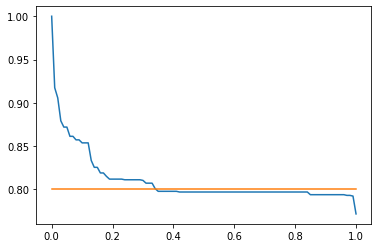

In [670]:
plt.plot(data_score.thresholds, data_score.p)
plt.plot(data_score.thresholds, data_score.r)

The answer to the question 3, is that the threshold precision and the recall curves intersection is at 0.3.

# Question 4

In [671]:
data_score['f1'] = 2 * data_score.p * data_score.r / (data_score.p + data_score.r)

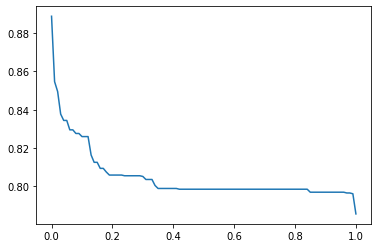

In [672]:
plt.plot(data_score.thresholds, data_score.f1)

In [673]:
data_score.iloc[data_score.f1.argmax()]

thresholds      0.000000
tp            211.000000
fn            211.000000
tn              0.000000
fp              0.000000
p               1.000000
r               0.800000
f1              0.888889
Name: 0, dtype: float64

The answer to the question 4 is the threshold F1 is maximum at 0.1.

# Question 5

In [674]:
# Created two different function 'train' and the 'predicts'
def train(data_train, y_train, C=1.0):
    dicts = data_train[features].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

def predicts(data, dv, model):
    dicts = data[features].to_dict(orient='records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    return y_pred

In [675]:
# Importing the KFold from the sklearn.model_selection
from sklearn.model_selection import KFold

In [676]:
# Saving the KFold method into the variable 'kfold'
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [677]:
# Created a for loop to traverse through data_full_train and we are going to get our standard deviation.  
score = []
for train_idx, val_idx in kfold.split(data_full_train):
    data_train = data_full_train.iloc[train_idx]
    data_validation = data_full_train.iloc[val_idx]
    
    y_train = data_train.card.values 
    y_val = data_validation.card.values 
    
    dv, model = train(data_train, y_train, C=1.0)
    y_pred = predicts(data_validation, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    score.append(auc)
    
print((np.mean(score)), np.std(score)) #'%.3f +- %.3f' %

0.9964498276814243 0.0027434713804377724


The answer to question 5 is is standard devidation of the AUC scores across different folds is 0.0027, with estimation its 0.003. 

# Question 6

In [678]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 1, 10]:
    score = []
    for train_idx, val_idx in kfold.split(data_full_train):
        data_train = data_full_train.iloc[train_idx]
        data_validation = data_full_train.iloc[val_idx]
    
        y_train = data_train.card.values
        y_val = data_train.card.values
    
        dv, model = train(data_train, y_train, C=C)
        y_pred = predicts(data_validation, dv, model)
    
        auc = roc_auc_score(y_val, y_pred)
        score.append(auc)
    
    print('%s: %.3f +- %.3f' % (C, (np.mean(score)), np.std(score)))

ValueError: ignored